# Exercise 3 - part 1: Association Test
### Chosen datasets: ```Blood stem cell (GSE18067)```, ```Erythroid (GSE18067)```

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Import data

In [2]:
df_eryt = pd.read_csv('./data/step3_erythroid_preprocessed_expression_data.csv')
df_stem = pd.read_csv('./data/step3_stem_preprocessed_expression_data.csv')
df_un_gen = pd.read_csv('./data/step3_unique_genotypes.csv')

In [3]:
# Drop the column from eryt data
df_eryt_no_symbol = df_eryt.drop('Symbol', axis=1)

# Drop the columns from genotypes
df_un_gen_only_BXD = df_un_gen.drop(['Unnamed: 0', 'Locus', 'Chr_Build37', 'Build37_position'], axis=1)

In [4]:
# Get the column names of the two dataframes
columns_df_without_symbol = df_eryt_no_symbol.columns
columns_df_un_gen_only_BXD = df_un_gen_only_BXD.columns

# Find the common columns
common_columns = columns_df_without_symbol.intersection(columns_df_un_gen_only_BXD)

# Filter the dataframes by the common columns
df_eryt_no_symbol_filtered = df_eryt_no_symbol[common_columns]
df_un_gen_only_BXD_filtered = df_un_gen_only_BXD[common_columns]

In [5]:
# Replace 'B' with 0 and 'D' with 1 in df_un_gen_only_BXD_filtered
df_un_gen_only_BXD_filtered.replace('B', 0, inplace=True)
df_un_gen_only_BXD_filtered.replace('D', 1, inplace=True)

/var/folders/gy/pcf16vh94yb5bw_rvktb_cyh0000gn/T/ipykernel_3442/3100740381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_un_gen_only_BXD_filtered.replace('B', 0, inplace=True)
/var/folders/gy/pcf16vh94yb5bw_rvktb_cyh0000gn/T/ipykernel_3442/3100740381.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_un_gen_only_BXD_filtered.replace('D', 1, inplace=True)
/var/folders/gy/pcf16vh94yb5bw_rvktb_cyh0000gn/T/ipykernel_3442/3100740381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

In [6]:
# remove rows with NaN values
df_eryt_no_symbol_filtered.dropna(inplace=True)
df_un_gen_only_BXD_filtered.dropna(inplace=True)

/var/folders/gy/pcf16vh94yb5bw_rvktb_cyh0000gn/T/ipykernel_3442/3128984312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_un_gen_only_BXD_filtered.dropna(inplace=True)


In [7]:
# remove columns with 'U' values
df_un_gen_only_BXD_filtered = df_un_gen_only_BXD_filtered.loc[:,~df_un_gen_only_BXD_filtered.isin(['U']).any()]

In [10]:
# Select the row from eryt data
eryt_row = df_eryt_no_symbol_filtered.iloc[2]
eryt_array = np.array(eryt_row)

# Select the row from genotypes
gen_row = df_un_gen_only_BXD_filtered.iloc[7]
gen_array = np.array(gen_row)

# Replace 'B' with 0 and 'D' with 1 in gen_array
gen_array[gen_array == 'B'] = 0
gen_array[gen_array == 'D'] = 1
gen_array = gen_array.astype(int)

Association test - using linear regression model, first try for 1 row each

In [ ]:
# perform linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(gen_array, eryt_array)

In [11]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(gen_array, eryt_array)

# Print the results
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R value: {r_value}')
print(f'P value: {p_value}')
print(f'Standard error: {std_err}')

Slope: 0.002980925085714399
Intercept: 8.608185798200001
R value: 0.003121971502427609
P value: 0.9905120465289847
Standard error: 0.24653261442717375


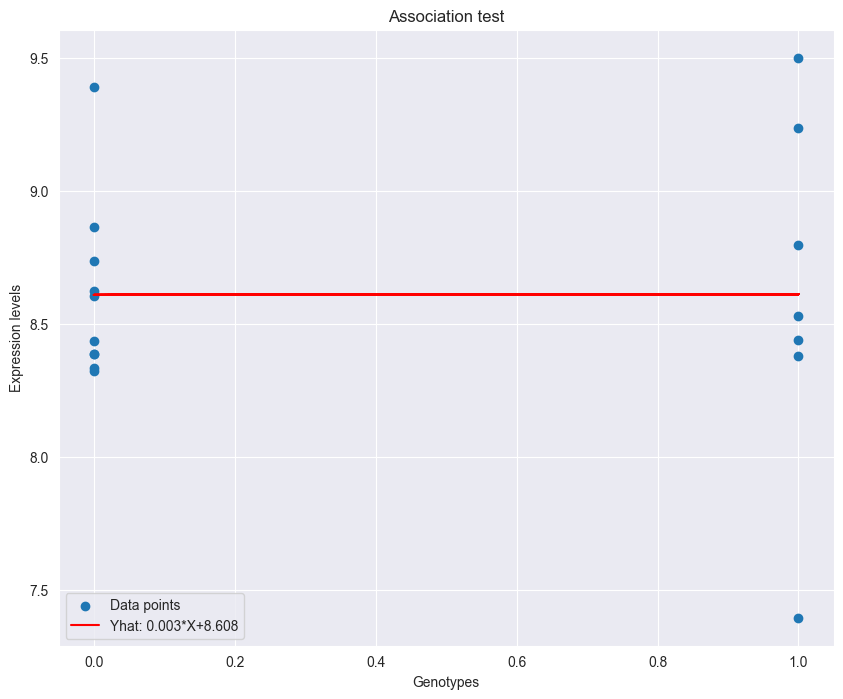

In [25]:
# Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(gen_array, eryt_array)
plt.plot(gen_array, slope * gen_array + intercept, color='red')
plt.legend(['Data points', f'Yhat: {round(slope,3)}*X+{round(intercept,3)}', 'Regression line', f'R^2: {round(r_value**2, 3)}'], loc='lower left')
plt.xlabel('Genotypes')
plt.ylabel('Expression levels')
plt.title('Association test')
plt.show()

Association test - using linear regression model, for all rows

In [10]:
# df_without_symbol_filtered = df_without_symbol[common_columns]
# df_un_gen_only_BXD_filtered = df_un_gen_only_BXD[common_columns]

# Find the common indices
common_indices = df_eryt_no_symbol_filtered.index.intersection(df_un_gen_only_BXD_filtered.index)

# Filter the dataframes to only include rows with the common indices
df_eryt_no_symbol_filtered_common = df_eryt_no_symbol_filtered.loc[common_indices]
df_un_gen_only_BXD_filtered_common = df_un_gen_only_BXD_filtered.loc[common_indices]

In [12]:
print(df_eryt_no_symbol_filtered_common.columns)
print(df_un_gen_only_BXD_filtered_common.columns)

Index(['BXD1', 'BXD12', 'BXD13', 'BXD14', 'BXD15', 'BXD16', 'BXD18', 'BXD19',
       'BXD2', 'BXD23', 'BXD27', 'BXD29', 'BXD31', 'BXD40', 'BXD6', 'BXD8',
       'BXD9'],
      dtype='object')
Index(['BXD1', 'BXD12', 'BXD13', 'BXD14', 'BXD15', 'BXD16', 'BXD18', 'BXD19',
       'BXD2', 'BXD23', 'BXD27', 'BXD29', 'BXD31', 'BXD40', 'BXD6', 'BXD8',
       'BXD9'],
      dtype='object')


In [20]:
# Initialize a dataframe to store the p-values
p_values = pd.DataFrame(index=df_eryt_no_symbol_filtered_common.columns, columns=df_un_gen_only_BXD_filtered_common.columns)

# Iterate over all pairs of columns
for row1 in df_eryt_no_symbol_filtered_common.iterrows():
    for row2 in df_un_gen_only_BXD_filtered_common.iterrows():
        # Perform linear regression on each pair of values and store the p-values
        p_value = df_eryt_no_symbol_filtered_common[row1].combine(df_un_gen_only_BXD_filtered_common[row2], lambda val1, val2: stats.linregress([val1], [val2])[3])

        # Store the p-value in the dataframe
        p_values.at[row1, row2] = p_value

# Add information to the column names
p_values.columns = [f'{col}_SNP' for col in p_values.columns]
p_values.index = [f'{idx}_expression' for idx in p_values.index]

print(p_values)

InvalidIndexError: (0, BXD1      9.682020
BXD12     9.457449
BXD13     9.431814
BXD14     6.488704
BXD15     9.921337
BXD16     9.979041
BXD18     8.632000
BXD19     9.902992
BXD2      8.937370
BXD23     8.895811
BXD27     9.104334
BXD29     7.640100
BXD31     8.488427
BXD40     9.141938
BXD6      9.971793
BXD8      7.925591
BXD9     10.147999
Name: 0, dtype: float64)

In [18]:
# Initialize a dataframe to store the p-values
p_values = pd.DataFrame(index=df_eryt_no_symbol_filtered_common.columns, columns=df_un_gen_only_BXD_filtered_common.columns)

# Iterate over all pairs of rows
for (_, row1), (_, row2) in zip(df_eryt_no_symbol_filtered_common.iterrows(), df_un_gen_only_BXD_filtered_common.iterrows()):
    # Perform linear regression on each pair of values and store the p-values
    p_value = row1.combine(row2, lambda val1, val2: stats.linregress([val1], [val2])[3])

    # Store the p-value in the dataframe
    p_values.loc[row1.name, row2.name] = p_value

# Add information to the column names
p_values.columns = [f'{col}_SNP' for col in p_values.columns]
p_values.index = [f'{idx}_expression' for idx in p_values.index]

print(p_values)

ValueError: Incompatible indexer with Series

In [22]:
# Initialize a dataframe to store the p-values
p_values = pd.DataFrame(index=df_eryt_no_symbol_filtered_common.columns, columns=df_un_gen_only_BXD_filtered_common.columns)

# Iterate over the index of the dataframes
for idx in df_eryt_no_symbol_filtered_common.index:
    # Get the rows
    row1 = df_eryt_no_symbol_filtered_common.loc[idx]
    row2 = df_un_gen_only_BXD_filtered_common.loc[idx]

    # Perform linear regression on each pair of values and store the p-values
    slope, intercept, r_value, p_value, std_err = stats.linregress(row1, row2)

    # Store the p-value in the dataframe
    p_values.loc[row1.name, row2.name] = p_value

# Add information to the column names
p_values.columns = [f'{col}_SNP' for col in p_values.columns]
p_values.index = [f'{idx}_expression' for idx in p_values.index]

print(p_values)

AttributeError: 'float' object has no attribute 'shape'